In [111]:
import pandas as pd
from pandas import Series, DataFrame

#removes all paranthesis and commas from the data, convert to float values
#assumes that a an opening paranthesis indicates a negative number
def make_float(x):
    if type(x) is float: #ignore exsiting 'nan'/float values
        return
    if "-" in x: #dash means there is no data for that year
        return float('nan')
    return float(x.replace("(", "-").replace(",","").replace(")",""))

city_budget = pd.read_csv('city_budget_data.csv')

city_budget["2015"] = city_budget["2015"].apply(make_float)
city_budget["2016"] = city_budget["2016"].apply(make_float)
city_budget["2017"] = city_budget["2017"].apply(make_float)
city_budget["2018"] = city_budget["2018"].apply(make_float)


fire_budget = city_budget[city_budget["Agency"] == "30 -  FIRE"]
fire_budget.reset_index(drop=True)

revenue_by_account_type = fire_budget[fire_budget["Account Type"] == "Revenue"].groupby(['Object']).sum()
print(revenue_by_account_type)


expenc_by_account_type = fire_budget[fire_budget["Account Type"] == "Expense"].groupby(['Object']).sum()
print(revenue_by_account_type)


                                           2015      2016      2017      2018
Object                                                                       
42110 - FEDERAL REVENUES OPERATING          0.0  -48180.0  -36615.0  -37224.0
42210 - STATE REVENUES OPERATING       -96728.0  -53234.0  -53868.0  -52353.0
42216 - PAYMENT FOR MUNICIPAL SERVICE   -8450.0  -13500.0  -13575.0  -14300.0
42310 - LOCAL REVENUES OPERATING            0.0  -50000.0  -63000.0  -70000.0
42410 - OTHER UNIT OF GOV REVENUES OP  -57023.0  -61862.0  -56914.0  -45007.0
43110 - REPRODUCTION SERVICES           -2514.0   -2425.0   -2118.0   -1570.0
43225 - SPECIAL DUTY                   -83384.0 -104093.0 -128038.0  -73087.0
43415 - INSPECT AND REINSPECT FEES      -6075.0  -10950.0  -19275.0   -8525.0
43710 - REIMBURSEMENT OF EXPENSE       -89673.0 -125327.0 -123698.0 -111765.0
44230 - ELEVATOR PERMITS AND INSPECTS -617670.0 -606447.0 -534775.0 -555937.0
44245 - FIRE PERMITS                  -403745.0 -423346.0 -40985

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


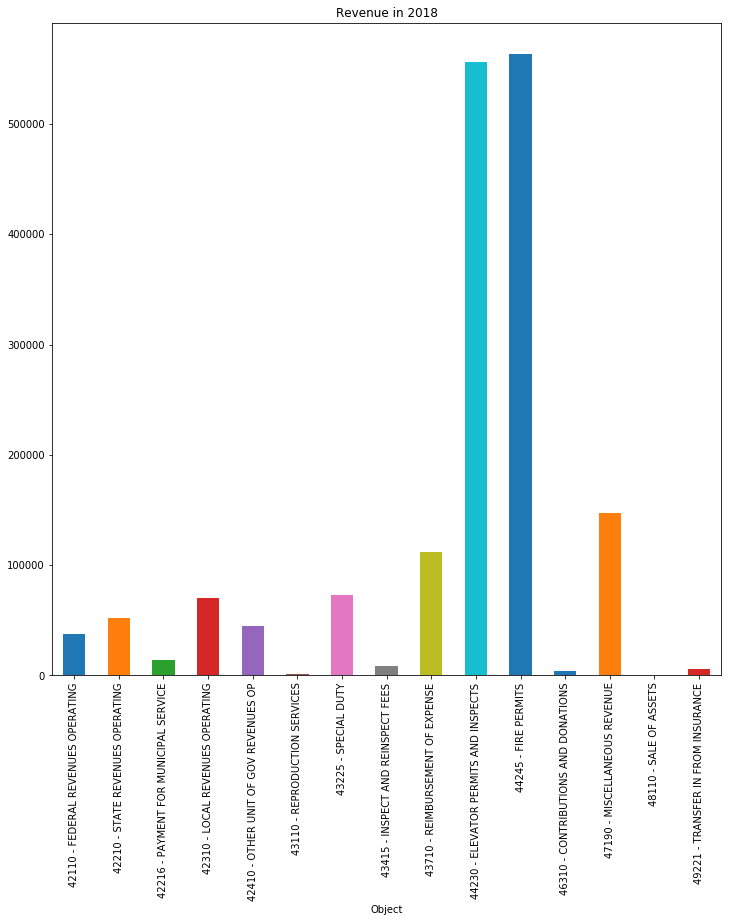

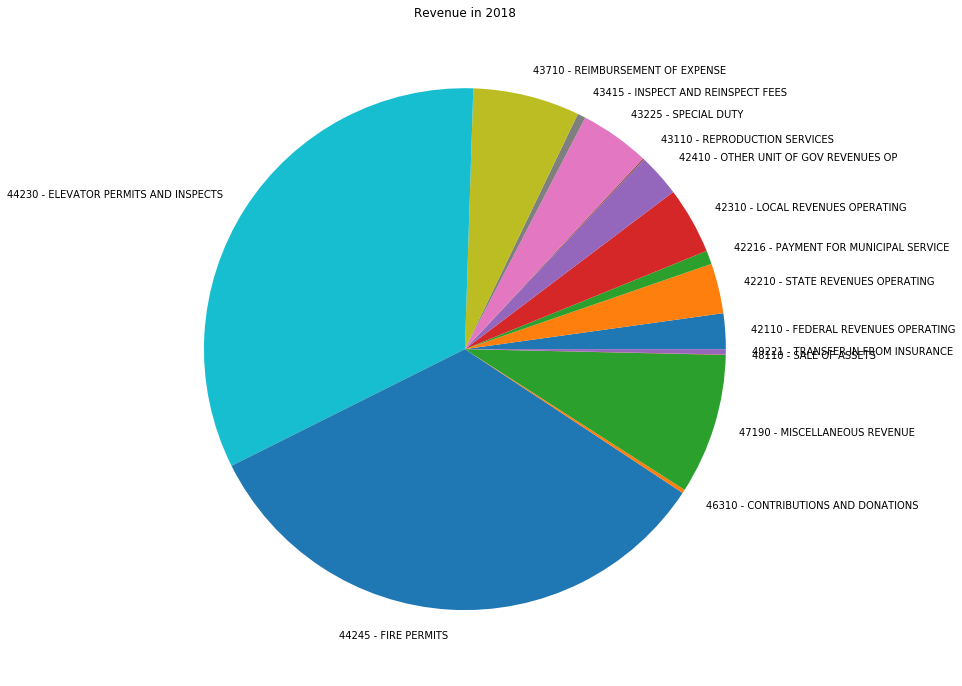

In [121]:
%matplotlib inline

#create two plots, a bar graph and a pie chart of the revenue sources for 2018. 
#TODO: Why is all revenue negative?
(revenue_by_account_type*-1).plot.bar(y = "2018", figsize = (12,12), legend = False, title = "Revenue in 2018")
(revenue_by_account_type*-1).plot.pie(y = "2018", legend = False, figsize=(12,12), label = "", title = "Revenue in 2018")




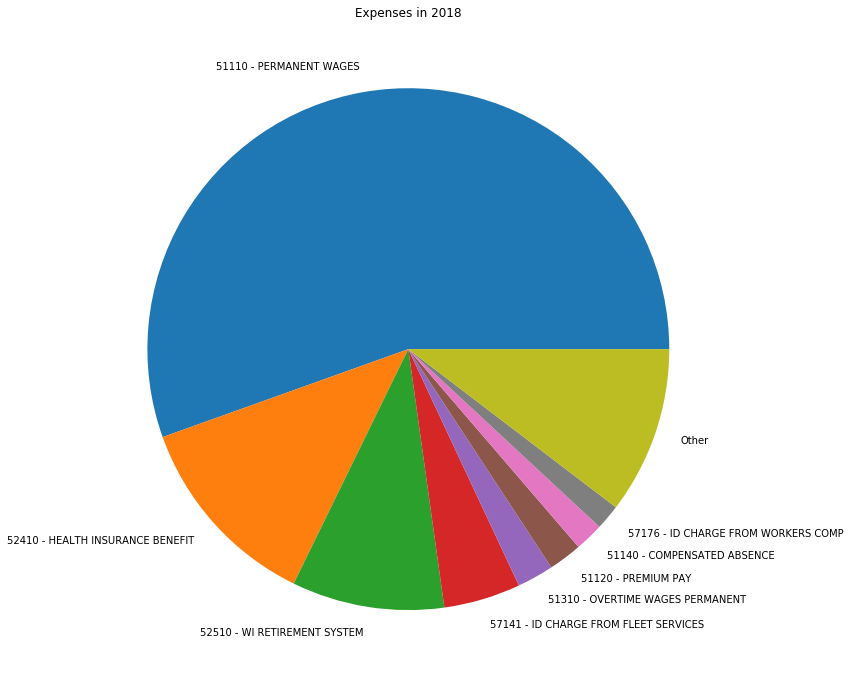

In [118]:
expense_by_account_type.sort_values(by = ["2018"], ascending=False, inplace = True)

other_expenses = Series([sum(expense_by_account_type["2018"]) - sum(expense_by_account_type["2018"].head(8))],index = ["Other"])
plotable_expenses = pd.concat([expense_by_account_type["2018"].head(8),other_expenses])

plotable_expenses.plot.pie(y = "2018", figsize = (12,12), legend = False, title = "Expenses in 2018", label = "")


